<a href="https://colab.research.google.com/github/gabitza-tech/ETTI-SummerSchool2025/blob/solved/MachineLearning_Intro_ImbalancedClasses_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Imbalanced Dataset Example - Binary Classification

In the real world, data is rarely **clean** or **perfectly balanced**.  
Some of the common challenges we face include:  

- ⚖️ **Imbalanced classes** — certain outcomes are much rarer than others.  
- ❓ **Missing values** — incomplete information across different attributes.  
- 🌍 **Domain shifts** — differences between training and test data distributions.  

---
To illustrate how to handle imbalanced data in Python, let’s explore the **Bank Marketing Dataset**. This publicly available dataset contains information about bank customers, with the target variable indicating whether a client subscribed to a term deposit after receiving a marketing call (“yes” vs. “no”).

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

bank_marketing = fetch_ucirepo(id=222)

# Separate the target labels from the rest of the features
x = bank_marketing.data.features
y = bank_marketing.data.targets

# Show some dataset metadata
print(bank_marketing.metadata)
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

# Exercise 1

### Tasks
1. Check dataset size.
2. Check number of features.
3. Check number of classes.
4. Check class distribution.
5. Check for missing data.


In [ ]:
# Shape of data and no features
print(x.shape)
print(y.shape)
# CODE
print("Class Distribution:")
print(y.value_counts())
print(f"Percentage: \n{y.value_counts(normalize=True) * 100}")

# Imbalance ratio (%)
imbalance_ratio = y.value_counts().min() / y.value_counts().max()
print(f"Imbalance ratio: {imbalance_ratio:.3f}")

# Check for missing data
print(x.isna().sum())

(45211, 16)
(45211, 1)
Class Distribution:
y  
no     39922
yes     5289
Name: count, dtype: int64
Percentage: 
y  
no     88.30152
yes    11.69848
Name: proportion, dtype: float64
Imbalance ratio: 0.132
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64


# Exercise 2

For most of these tasks, look at the previous exercise!

### Tasks:

1. Handle missing features. (can we simply drop samples?)
2. Preprocess features categorical to numerical. - Hint: use `OneHotEncoder` or `LabelEncoder`;
3. Split dataset in train and test sets. (70-30 split)
4. Scale your data. - Whatever scaler you want
4. Train a logistic regression model.
5. Check accuracy.
6. Check precision, recall and f1-score.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Numerically encode features based on the number of unique values
le = LabelEncoder()
# One-Hot Encode Features
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Separate categorical and numeric columns
cat_cols = x.select_dtypes(include=["object", "category"]).columns
num_cols = x.select_dtypes(include=["int64", "float64"]).columns

# One-Hot Encode categorical features - Each feature, will be One-Hot Encoded
x_encoded_array = ohe.fit_transform(x[cat_cols])

# Convert encoded array back to DataFrame
x_encoded_df = pd.DataFrame(
    x_encoded_array,
    columns=ohe.get_feature_names_out(cat_cols),
    index=x.index
)

# Combine numeric columns and encoded categorical columns
x_encoded = pd.concat([x[num_cols], x_encoded_df], axis=1)

# x_encoded now has more columns than the original x, but with categorical columns one-hot encoded
x_encoded.head()

# For labels, we can simply transform them in numerical values in the case of binary classification
y_encoded = le.fit_transform(y)
print(set(y_encoded))


{np.int64(0), np.int64(1)}


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Complete the function - search it
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)


# CODE HERE
scaler_std = StandardScaler()
x_train_std = scaler_std.fit_transform(x_train)
x_test_std = scaler_std.transform(x_test)


print(x_train_std[:2])


[[-0.93046095 -0.44381323 -0.8170392  -0.6801517  -0.5668498  -0.4100377
  -0.23477381 -0.36173998 -0.52637164 -0.18470058 -0.17040209 -0.50988555
  -0.22999889 -0.18760798  3.1610692  -0.14785082 -0.44881513 -0.17284114
  -0.08094414 -0.36006226  0.81323247 -0.62873591 -0.42724108  0.97642098
  -0.64250486 -0.20813255  0.13470325 -0.13470325 -0.89194981  0.89194981
   0.43697334 -0.43697334  0.73653036 -0.26180473 -0.63529628 -0.26530153
  -0.39946285 -0.07128438 -0.24766669 -0.17932684  2.35171015 -0.36524971
  -0.10374649 -0.66199585 -0.30977741 -0.13025792 -0.11112    -0.34568028
  -0.20705605 -0.18533995  0.47020251]
 [-0.55387131 -0.3806249   0.14323561 -0.21454513 -0.5668498  -0.4100377
  -0.23477381 -0.36173998 -0.52637164 -0.18470058 -0.17040209 -0.50988555
  -0.22999889 -0.18760798  3.1610692  -0.14785082 -0.44881513 -0.17284114
  -0.08094414 -0.36006226  0.81323247 -0.62873591 -0.42724108  0.97642098
  -0.64250486 -0.20813255  0.13470325 -0.13470325 -0.89194981  0.89194981
 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=500)
clf.fit(x_train_std, y_train)

# Predict and evaluate
y_pred = clf.predict(x_test_std)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))


# Alternatively, just for checking accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     11977
           1       0.65      0.35      0.46      1587

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

Accuracy: 0.9023149513417871


# Let's plot a confusion matrix

Using a combination of scikit-learn, seaborn and matplotlib.

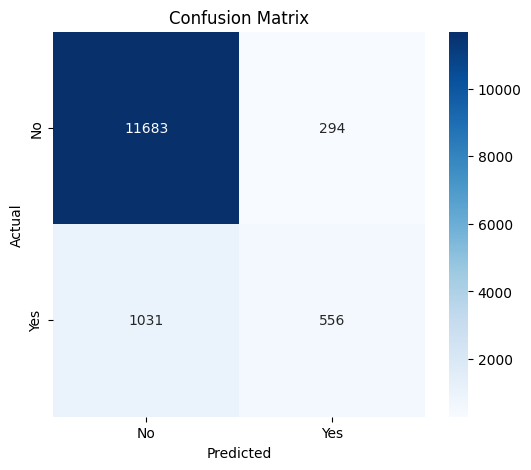

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Train with class balance the logist regression

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=500, class_weight='balanced')
clf.fit(x_train_std, y_train)

# Predict and evaluate
y_pred_balanced = clf.predict(x_test_std)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))


# Alternatively, just for checking accuracy
acc = accuracy_score(y_test, y_pred_balanced)
print("Accuracy:", acc)



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91     11977
           1       0.42      0.81      0.55      1587

    accuracy                           0.85     13564
   macro avg       0.69      0.83      0.73     13564
weighted avg       0.91      0.85      0.87     13564

Accuracy: 0.8464317310527868


# Plot a confusion matrix for LR with class balancing

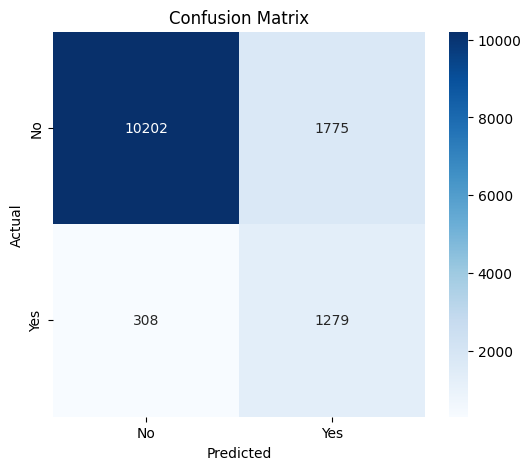

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_balanced)

# Plot using seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# 1️⃣ Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(x_train, y_train)

clf_rus = LogisticRegression(max_iter=1000)
clf_rus.fit(X_rus, y_rus)
y_pred_rus = clf_rus.predict(x_test)

print("Random Undersampling")
print("Accuracy:", accuracy_score(y_test, y_pred_rus))
print(classification_report(y_test, y_pred_rus))

f1_weighted = f1_score(y_test, y_pred_rus, average='weighted')
print("Weighted F1-Score:", accuracy_score(y_test, y_pred_rus))

Random Undersampling
Accuracy: 0.8312444706576231
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     11977
           1       0.39      0.82      0.53      1587

    accuracy                           0.83     13564
   macro avg       0.68      0.82      0.71     13564
weighted avg       0.90      0.83      0.85     13564

Weighted F1-Score: 0.8312444706576231


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Upsampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score


# 1️⃣ Random Undersampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(x_train, y_train)

clf_ros = LogisticRegression(max_iter=1000)
clf_ros.fit(X_ros, y_ros)
y_pred_ros = clf_ros.predict(x_test)

print("Random Undersampling")
print("Accuracy:", accuracy_score(y_test, y_pred_ros))
print(classification_report(y_test, y_pred_ros))

f1_weighted = f1_score(y_test, y_pred_ros, average='weighted')
print("Weighted F1-Score:", accuracy_score(y_test, y_pred_ros))

Random Undersampling
Accuracy: 0.834488351518726
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     11977
           1       0.40      0.81      0.53      1587

    accuracy                           0.83     13564
   macro avg       0.68      0.82      0.72     13564
weighted avg       0.90      0.83      0.86     13564

Weighted F1-Score: 0.834488351518726


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


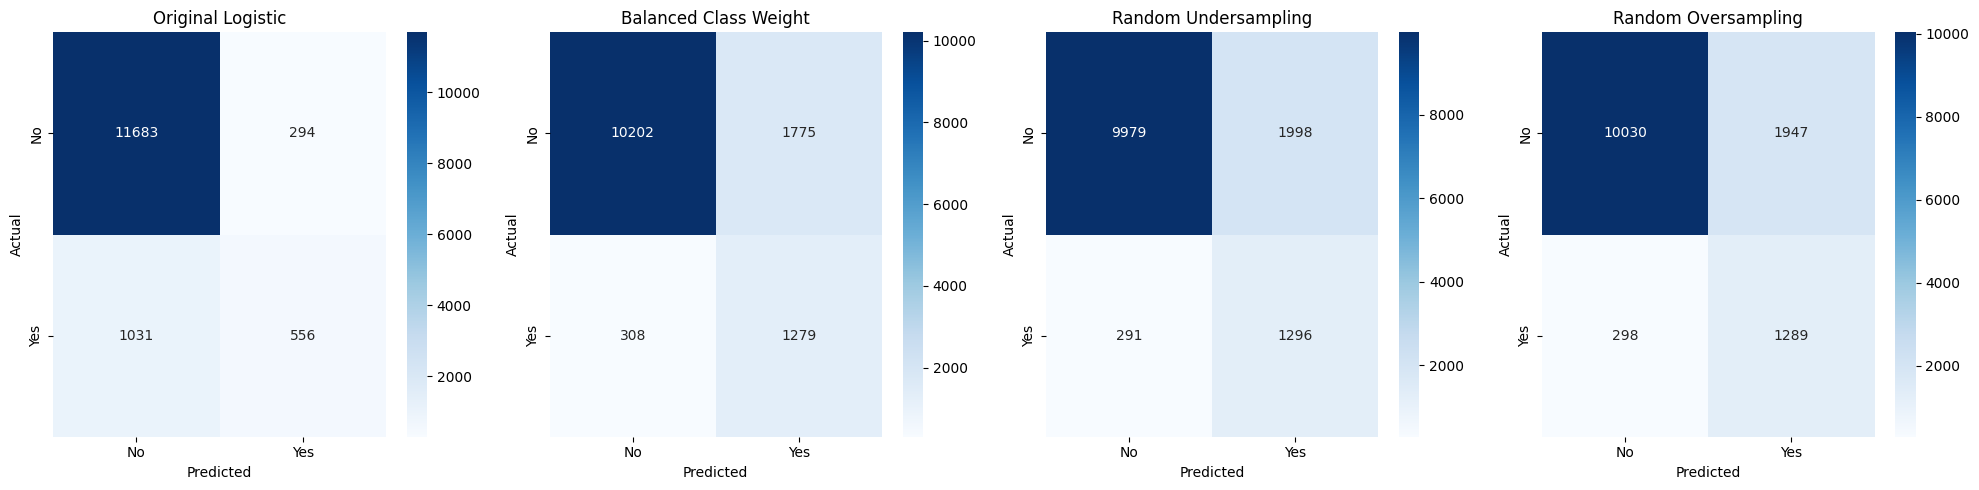

In [ ]:
# Prepare data
preds = {
    'Original Logistic': y_pred,
    'Balanced Class Weight': y_pred_balanced,
    'Random Undersampling': y_pred_rus,
    'Random Oversampling': y_pred_ros
}

# Create 1 row, 4 columns plot
fig, axes = plt.subplots(1, 4, figsize=(20,5))

for ax, (title, pred) in zip(axes, preds.items()):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()